<a href="https://colab.research.google.com/github/ldasari9/IT5443-lab1/blob/main/IT7103Assignment3_lakshmi_Gayathri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
from google.colab import auth
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
auth.authenticate_user()
print('Authenticated')
#Access the google drive to import CSV file
from google.colab import drive
drive.mount('/content/drive')

Authenticated
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset
stroke_data = pd.read_csv('/content/drive/MyDrive/stroke.csv')
print(stroke_data)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [ ]:
# Checking for missing values
print(stroke_data.isnull().sum())
#let's fill missing values with the mean of the column

numeric_cols = stroke_data.select_dtypes(include=['number']).columns
stroke_data[numeric_cols] = stroke_data[numeric_cols].fillna(stroke_data[numeric_cols].mean())

# Encode categorical variables if any (using one-hot encoding)
# Assuming 'gender' and other columns are categorical
categorical_cols = stroke_data.select_dtypes(include=['object']).columns
stroke_data = pd.get_dummies(stroke_data, columns=categorical_cols, drop_first=True)

# Scale features if necessary (using StandardScaler)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(stroke_data.drop(columns=['stroke']))

# Convert scaled features back to DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=stroke_data.columns.drop('stroke'))

# Add the target variable back to the DataFrame
scaled_features_df['stroke'] = stroke_data['stroke']

# Display the preprocessed data
print(scaled_features_df.head())


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
         id       age  hypertension  heart_disease  avg_glucose_level  \
0 -1.298312  1.051434     -0.328602       4.185032           2.706375   
1  0.716371  0.786070     -0.328602      -0.238947           2.121559   
2 -0.255478  1.626390     -0.328602       4.185032          -0.005028   
3  1.118363  0.255342     -0.328602      -0.238947           1.437358   
4 -1.647136  1.582163      3.043196      -0.238947           1.501184   

            bmi  gender_Male  gender_Other  ever_married_Yes  \
0  1.001234e+00     1.189990      -0.01399          0.723884   
1  4.615554e-16    -0.840343      -0.01399          0.723884   
2  4.685773e-01     1.189990      -0.01399          0.72

**3.	Please examine the target and determine whether this should be a regression or classification task.**

In [ ]:
# Check the distribution of the target variable
print(stroke_data['stroke'].value_counts())

# Determine if it's a regression or classification task
# If the target has two unique values, it's a classification task
if stroke_data['stroke'].nunique() == 2:
    task = 'classification'
else:
    task = 'regression'

print(f"The task is a {task} task.")


stroke
0    4861
1     249
Name: count, dtype: int64
The task is a classification task.


**Please finetune three models for the task you have determined. **

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Split the data into training and testing sets
X = scaled_features_df.drop(columns=['stroke'])
y = scaled_features_df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
dt = DecisionTreeClassifier()
gb = GradientBoostingClassifier()
knn = KNeighborsClassifier()

# Train and evaluate each model
models = {'Decision Tree': dt, 'Gradient Boosting': gb, 'KNN': knn}
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

# Display the results
for model_name, metrics in results.items():
    print(f"Results for {model_name}:")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")
    print()

Results for Decision Tree:
Accuracy: 0.9178
Precision: 0.1944
Recall: 0.1129
F1 Score: 0.1429
ROC AUC: 0.5413

Results for Gradient Boosting:
Accuracy: 0.9384
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC AUC: 0.8296

Results for KNN:
Accuracy: 0.9374
Precision: 0.2500
Recall: 0.0161
F1 Score: 0.0303
ROC AUC: 0.6615



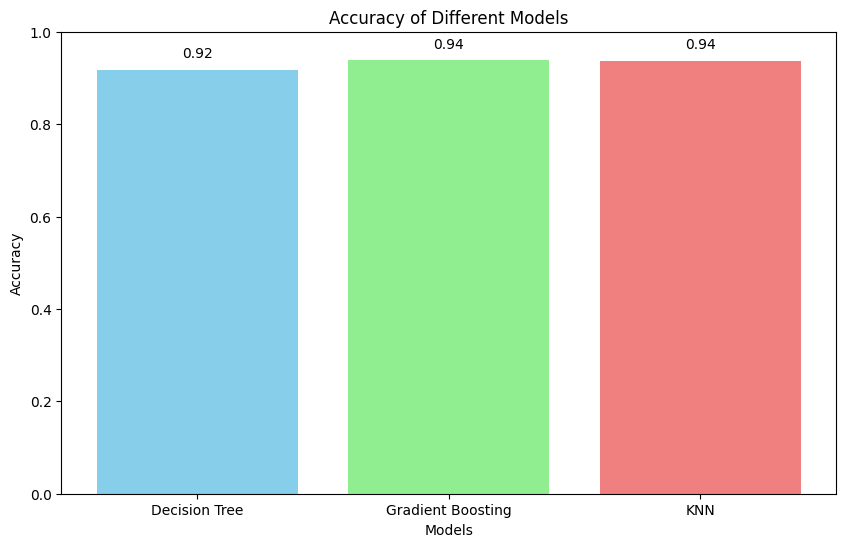

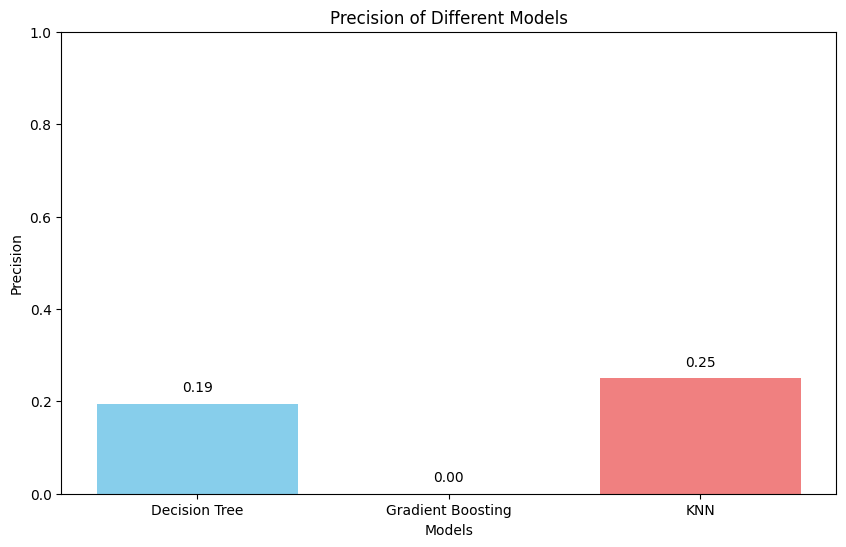

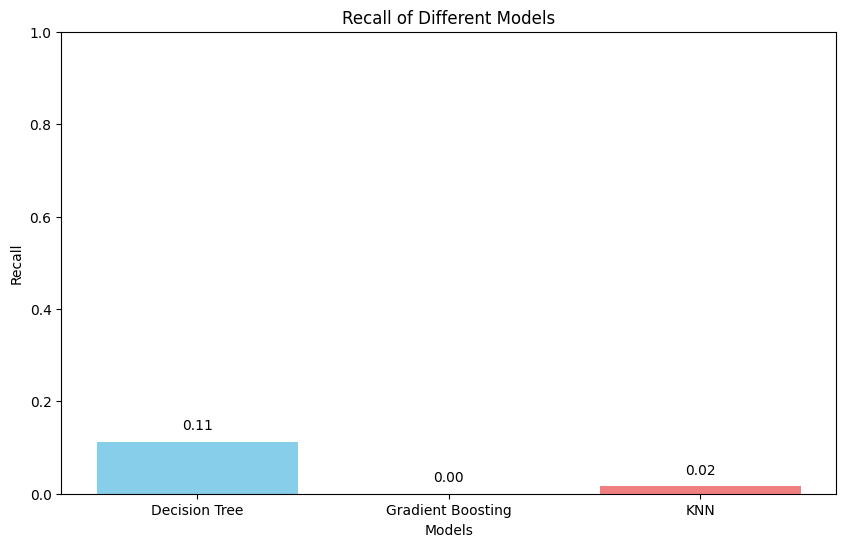

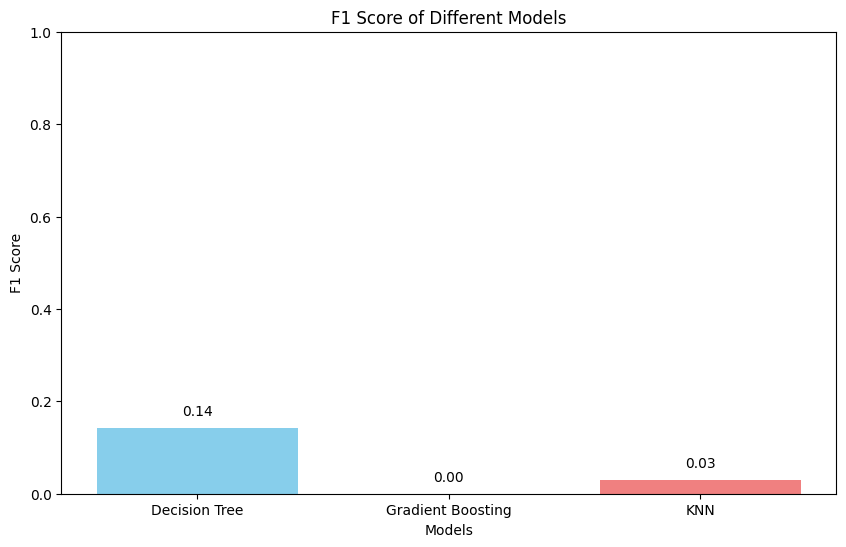

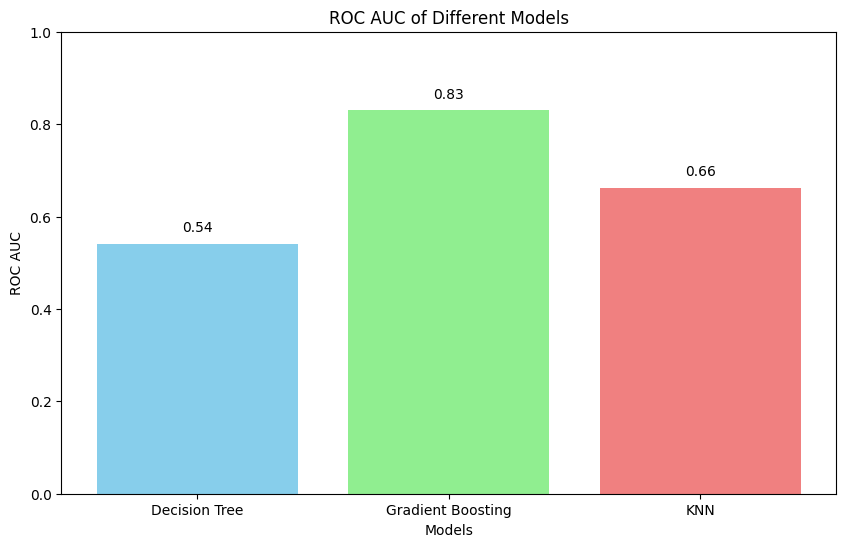

In [ ]:
import matplotlib.pyplot as plt

#Plotting the Performance Metrics
# Plot the results
metrics_df = pd.DataFrame(results).T

# Plot accuracy, precision, recall, F1 score, and ROC AUC
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.bar(metrics_df.index, metrics_df[metric], color=['skyblue', 'lightgreen', 'lightcoral'])
    plt.title(f'{metric} of Different Models')
    plt.xlabel('Models')
    plt.ylabel(metric)
    plt.ylim(0, 1)
    for i, v in enumerate(metrics_df[metric]):
        plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom')
    plt.show()
